# Linear Regression

This notebook implements linear regression in numpy using the least squares method. Some fitness metrics are also discussed.

Some imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d import Axes3D

sys.path.append("..")

In [2]:
from models.linear_regression import LinearRegression

In [3]:
%matplotlib inline

## Simple linear regression: One variable

Linear regression is a method that allows to predict the value of a quantitative respone Y on the basis of some predictor variables $\{X_1, X_2, ..., X_n\}$. This approach assumes a linear relationship between the response and the predictors. This takes the form:

$$
\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n,
\end{equation}
$$

where $\beta_0, \beta_1, ..., \beta_n$ are unknown parameters. First, we implement a simple version where there is only one variable $X$. This leave us with 2 paremeters, the intercept($\beta_0$) and the coefficient($\beta_1$) of the function:
$$
\begin{equation}
Y = \beta_0 + \beta_1X
\end{equation}
$$

Based on a training set we produce the estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ that fit the training data, we can later use them to predict future values of the response $Y$ for new values of $X$ as:
$$
\begin{equation}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_i
\end{equation}
$$

In this notation $\hat{y}$ is the predicted value of $Y$ for $X = x_i$

### Generate the data

We are gonna try to interpolate the function $y = 5x + 2$

We take randomly 20 points in the interval $[0, 5)$, this correspond to our set of training samples $X = \{x_1, x_2, ..., x_{20}\}$

In [4]:
sample_size = 20

# Parameters to estimate
b0 = 2
b1 = 5

# Standard deviation of the simulated irreducible error
e = 2


x = np.random.random_sample(sample_size)*5

We compute the dependent variable, $y_i$, mapping with the function and adding some random noise to the data.

We are using zero mean and two standar deviation normal distributed noise.

In [5]:
y = (b1*x + b0) + e*np.random.randn(sample_size)

Let's check the data we are going to fit

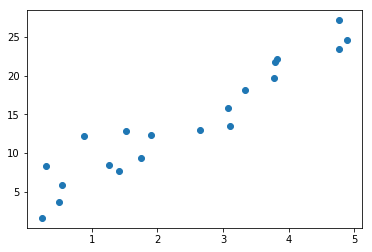

In [6]:
plt.plot(x, y, 'o')
plt.show()

## Least squares method

Now fit the data using the least squares technique, we are going to estimate parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ corresponing to the parameters of the line $y = \beta_0 + \beta_1x$ that generated the data. The least square method computes the parameters that minimize the residual sum of squares (RSS) defined as:
$$
\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

The analytic solution of the values of $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the RSS is:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2}, \\
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{x}
$$

In [7]:
def simple_linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_dev = x-x_mean
    y_dev = y-y_mean

    b1 = np.sum(x_dev*y_dev)/np.sum(x_dev**2)
    b0 = y_mean - x_mean*b1
    return b0, b1

Intercept = 3.4496397086575303 
Coefficient = 4.4062482424628575


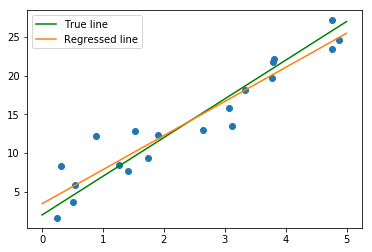

In [8]:
b0_hat, b1_hat = simple_linear_regression(x, y)
print("Intercept = "+str(b0_hat)+" \nCoefficient = " + str(b1_hat))

# Plottin rergession line over data
x_axis = np.linspace(0, 5, 100)
plt.plot(x, y, 'o')
plt.plot(x_axis, b1*x_axis + b0, label='True line', color='green')
plt.plot(x_axis, b1_hat*x_axis + b0_hat, label='Regressed line')
plt.legend()
plt.show()

Using the LinearRegression class:

In [9]:
simple_model = LinearRegression()
beta_aux = simple_model.fit(x.reshape(-1, 1), y)

print("Estimated parameters of the LinearRegression class\n"
      + "Intercept = "+str(beta_aux[0])+" \nCoefficient = " + str(beta_aux[1]))

Estimated parameters of the LinearRegression class
Intercept = 3.449639708657516 
Coefficient = 4.406248242462863


### Making new predictions

We can now predict the response for a new value $x_i$ as:
$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i
$$

In [10]:
x_test = 2

pred_test = b0_hat + x_test*b1_hat

result = "For a test value of x = %.2f, the predicted response is y_hat = %.2f, and the true value is y = %.2f" % (x_test, pred_test, (b1*x_test + b0))
print(result)

For a test value of x = 2.00, the predicted response is y_hat = 12.26, and the true value is y = 12.00


Predicted value using the LinearRegression model:

In [11]:
pred_test = simple_model.predict(x_test)
print("Predicted value: %.2f" % pred_test)

Predicted value: 12.26


## Fitness metrics

### Residual Standard Error of the estimation

The residual standard error (RSE) is an estimate of the standard deviation of the random error term $\epsilon$. Typically we dont know $\epsilon$ and it is considered the irreducible error. However in this case we have generated the data and simulated noise, so $\epsilon$ can be identified with the added noise. This measure gives an estimation of the amount that a prediction deviates from the true line in average. The metric is defined as follows 
$$
\text{RSE} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \hat{y}_i)^2},
$$
where $n$ is the number of samples.

In [12]:
def stdError(x, y, beta):
    y_pred = beta[0] + x*beta[1]
    return np.sqrt(np.sum((y_pred-y)**2)/(x.size-2))

In [13]:
stdE = stdError(x, y, [b0_hat, b1_hat])
print("Estimated standard error: %.2f" % stdE)
print("Estimated standard error of the model: %.2f" % simple_model.std_err)

Estimated standard error: 2.33
Estimated standard error of the model: 2.33


Notice that the output is in units of $y$, so the number on its own does not give much information about the fitness, the magnitud of $y$ should be accounted. It is not the same to deviate $2$ units from the true value when this is $y_i = 10000$ than when it is $y_i = 1$. For this reason the RSE has to be interpreted along with the scale of $Y$. To overcome this limitation we can use the $R^2$ Statistic.

### $R^2$ Statistic


The R squared is used to verify how well the model describes the data. This metric is the proportion of variability explained, because it's a proportion it takes values in the range $[0, 1]$ and avoids the problem of being subject to the scale of $Y$. But how can we measure the explained variability? To do this we can exploit a couple concepts. 

The total variance of the response $Y$ can be measured using the total sum of squares (TSS) defined as
$$
\text{TSS} = \sum_{i=1}^n(y_i - \overline{y})^2
$$

Besides, the residual sum of squares (RSS) represents the amount of variability that is left after performing the regression. The R squared statistic is defined then as
$$
R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}} = \frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{\sum_{i=1}^n(y_i - \overline{y})^2}
$$

In [14]:
def r2(x, y, beta):
    y_pred = beta[0] + x*beta[1]
    
    y_mean = np.mean(y)

    y_stdev = (y-y_mean)**2
    y_pstdev = (y_pred-y_mean)**2
    return np.sum(y_pstdev)/np.sum(y_stdev)

Let's check our $R^2$ score

In [15]:
r2score = r2(x, y, [b0_hat, b1_hat])
print("R squared score: %.2f" % r2score)
print("R squared score of the model: %.2f" % simple_model.r2)

R squared score: 0.90
R squared score of the model: 0.90


It is actually very good, it might be because we have small noise.
For noisier data it should perform worse.

In [16]:
# Use a bigger standard deviation for the simulated error, this is more noise
noisier_e = 5

y_noisy = (b1*x + b0) + noisier_e*np.random.randn(sample_size)

# Estimate parameters
[b0_hat, b1_hat] = simple_model.fit(x.reshape(-1, 1), y_noisy)

# Fitness metrics
print("Estimated standard error: %.2f" % simple_model.std_err)
print("R squared score: %.2f" % simple_model.r2)

Estimated standard error: 5.49
R squared score: 0.60


We can see that the estimate of the standard error has grown, keeping track of the real error, and the r2 score is worse too.

## Comparison to the sklearn implementation

To the aim of validating our results let's compare them against the linear regression implementation of sklearn. 

In [17]:
from sklearn import linear_model

In [18]:
linear = linear_model.LinearRegression()
linear.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print("Sklearn beta0: " + str(linear.intercept_))
print("Sklearn beta1: " + str(linear.coef_))
print("Sklearn R squared: " + str(linear.score(x.reshape(-1, 1), y.reshape(-1, 1))))

Sklearn beta0: [3.44963971]
Sklearn beta1: [[4.40624824]]
Sklearn R squared: 0.9034082489890641


The same! Not surprise really.. This is beacuase the algorithm is deterministic. In more complex algorithms such as in a MLP we could different results due to, for example, random initialization.

## General linear regression: multiple independant variables

The model can be generalized as:
$$
Y = \beta X
$$
where $\beta$ is the vector $[\beta_0, \beta_1, ..., \beta_n]$ and X is the collection of examples(one per column). The first entry in each training example is $1$ as it is the coefficient of the intercept.

In this case instead of fitting a line we fit an n-dimensional hyperplane. Let's see this in 2D

In [19]:
sample_size = 50

# Parameters to estimate
beta = np.array([1, 2, -2])

# Standard deviation of the simulated irreducible error
e = 2

# Generate random points
x = np.random.rand(3, sample_size)*5

# First feature must be 0 as it's the intercept coefficient
x[0, :] = 1

# Simulate data with noise
y = (np.matmul(beta, x)) + e*np.random.randn(sample_size)

### Visualize the data

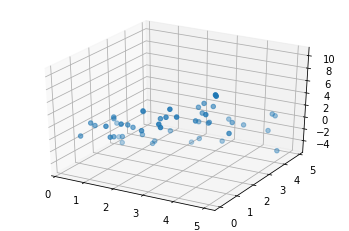

In [20]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(x[1, :], x[2, :], y);
plt.show()

### Estimator for $\beta$

Using the least squares method the resulting estimator is:
$$
\hat{\beta} = (X^TX)^{-1}X^TY
$$
This assumes $X$ has full column rank. If $M^+$ is the Moore-Penrose pseudoinverse of any matrix $M$, then $\beta$ can be estimated as:

$$
\hat{\beta} = X^+Y,
$$

which can be expressed as:
$$
\hat{\beta} = (X^TX)^+X^TY,
$$

obtaining a correct estimator for $\beta$ even when $X$ has less than full rank.

In [21]:
beta_hat = np.matmul(y, np.matmul(np.linalg.pinv(np.matmul(x.T, x)), x.T))
print("Estimated parameters: {}".format(beta_hat))

Estimated parameters: [ 1.34764713  1.58167175 -2.02217592]


Using the LinearRegression model:

In [23]:
linear_model = LinearRegression()

# The model expects the data without the rows of ones and with shape (n_samples, n_features)
beta_aux = linear_model.fit(x[1:, :].T, y)
print("Estimated parameters: {}".format(beta_aux))

Estimated parameters: [ 1.34764713  1.58167175 -2.02217592]


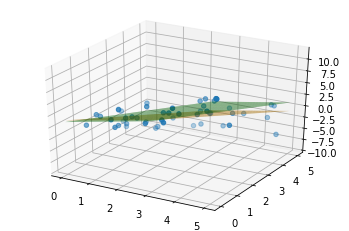

In [24]:
xx, yy = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
z = beta[0] + beta[1]*xx + beta[2]*yy
z_hat = beta_hat[0] + beta_hat[1]*xx + beta_hat[2]*yy

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(x[1, :], x[2, :], y);
ax.plot_surface(xx, yy, z, alpha=0.5, color='green', label='True plane')
ax.plot_surface(xx, yy, z_hat, alpha=0.5, color='orange', label='Regressed plane')
plt.show()

### Fitness metrics

In [25]:
print("Estimated standard error: %.2f" % linear_model.std_err)
print("R squared score: %.2f" % linear_model.r2)

Estimated standard error: 1.83
R squared score: 0.73


## Bibliography

* [Wikipedia: Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)
* [Proofs involving ordinary least squares](https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares#Least_squares_estimator_for_.CE.B2)
* [Regression via pseudoinverse](https://spartanideas.msu.edu/2015/10/21/regression-via-pseudoinverse/)